# How to eliminate customer churn

by Jarrid Jones 2022 June

### Project Goal

The goal of this project is to identify the attritubtes of customers who churned from Telco in order to make recommendations of the best way to retain customers.

### Project Description

### Initial Questions

---

### Data Dictionary

 ---

### Wrangle Telco Data


To acquire the telco data, I used the telco_churn_db in our mySQL server, and selected all columns from the customers, contract_types, internet_service, and payment_types table. 

"""

                select * from customers
                join contract_types using (contract_type_id)
                join internet_service_types using (internet_service_type_id)
                join payment_types using (payment_type_id)
                
                """

In [13]:
# acquire data from sql database 
import acquire
 
# make the connection the database and run the query and return the table in the form of a dataframe. 
df = acquire.get_telco_data()

In [17]:
df.contract_type.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: contract_type, dtype: int64

In [16]:
df.shape

(7043, 24)

To clean the data, I did the following in order:

Drop columns: . 'internet_service_type_id','Contract_type_id','Customer_id'

Encode Varaibles in columns: Encoded variables for 'Gender', 'Partner', 'Dependents', 'Phone_service','Multiple_lines','Online_security', 'Online_backup', 'Device_protection', 'Tech_support', 'streaming_tv', 'Streaming_movies', 'Paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type'.

Data type change: 'Total_charges' to a float.

Drop columns: 'gender', 'partner', 'dependents', 'phone_service', 'paperless_billing', 'churn', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract_type', 'internet_service_type', 'payment_type'

In [11]:
import prepare
import pandas as pd
# Importing cleaned dataframe
df = prepare.prep_telco_encoded()

# spliting dataframe into 3 samples 
telco_train, telco_validate, telco_test = prepare.split_telco(df)

In [12]:
# Verifcation of split data set
print(telco_train.shape)
print(telco_validate.shape)
print(telco_test.shape)

(3937, 20)
(1688, 20)
(1407, 20)


Our data is now split into 3 samples so that we can use the train sample to explore, fit to models and evaluate without looking at new data.

The validate is used to verify that our models built are not overfit to the train dataset.

The test set is used to give an estimate of how this model will perform on data is has never seen in the future.

---


### Set the Data Context

73% of customers do not churn. We have data from 7043 customers, x of which are males, x of which traveled in 1st class, and the average fare of all passengers was $x.yy.

# build a viz here setting the context of the data 


---


### Exploratory Analysis: Who was more likely to churn?


I have answered these questions

1.

2.

3.


### 

### Summary: Who is most likeily to churn?

text

---

### Predicting Churn

In [19]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text



import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
# create X & y version of train, where y is a series with just the churned_encoded variable and X are all the features. 

X_train = telco_train.drop(columns=["churn_encoded"])
y_train = telco_train.churn_encoded

X_validate = telco_validate.drop(columns=["churn_encoded"])
y_validate = telco_validate.churn_encoded

X_test = telco_test.drop(columns=["churn_encoded"])
y_test = telco_test.churn_encoded

#### Baseline

I will set a baseline prediction by predicting all customers to not churn (churn == 0). I will evaluate the accuracy of that.



The mode is a great baseline

In [25]:
baseline = y_train.mode()

Produce a boolean array with True representing a match between the baseline prediction and reality

In [23]:
matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline prediction: {baseline[0]}")
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline prediction: 0
Baseline accuracy: 0.73


#### Fit 3 models

The top 3 models we built were a decision tree, random forest, and knn. The models differed in (the features, the algorithms) The random forest performed the best at x% accuracy as you will see.

##### Random Forest

In [32]:
# Create the random forest object
rf = RandomForestClassifier(max_depth=3, random_state=123)

# Fitting to random forest
rf.fit(X_train, y_train)

# Chart showing evaluation the feature importance sorting from highest to lowest of importance
pd.concat([pd.DataFrame(X_train.columns).rename(columns={0: 'column'}), pd.DataFrame(rf.feature_importances_).rename(columns={ 0: 'importance'})], axis=1).sort_values(by=['importance'], ascending=False)

,column,importance
16,contract_type_encoded,0.217344
1,tenure,0.172778
10,online_security_encoded,0.164590
13,tech_support_encoded,0.122575
3,total_charges,0.085074
2,monthly_charges,0.059054
17,internet_service_type_encoded,0.044278
11,online_backup_encoded,0.038644
12,device_protection_encoded,0.032525
15,streaming_movies_encoded,0.023050


In [34]:
# Classify each customer by their possibility to churn.
y_pred = rf.predict(X_train)

# Estimate the probability of each customer, using the training data.
y_pred_proba = rf.predict_proba(X_train)

# Chart with customer predection and probability to churn chance. concated 'y_pred' and 'y_pred_proba' on index
pd.concat([pd.DataFrame(y_pred).rename(columns={0: 'prediction'}), pd.DataFrame(y_pred_proba).rename(columns={ 0: 'no probability', 1: 'yes probability'})], axis=1)


In [75]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.83


,0,1
0,0.906509,0.093491
1,0.851449,0.148551
2,0.882025,0.117975
3,0.767627,0.232373
4,0.890880,0.109120
...,...,...
3932,0.598609,0.401391
3933,0.587115,0.412885
3934,0.963734,0.036266
3935,0.609350,0.390650


In [76]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2891
           1       0.73      0.58      0.64      1046

    accuracy                           0.83      3937
   macro avg       0.79      0.75      0.77      3937
weighted avg       0.82      0.83      0.82      3937



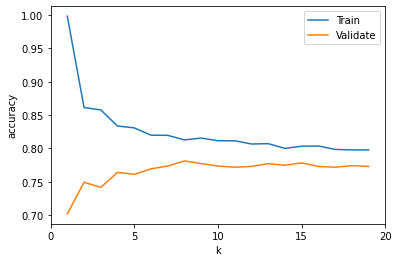

In [77]:
k_range = range(1, 20)
train_scores = []
validate_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    validate_scores.append(knn.score(X_validate, y_validate))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_scores, label='Train')
plt.plot(k_range, validate_scores, label='Validate')
plt.legend()
plt.xticks([0,5,10,15,20])
plt.show()

##### Decision Tree

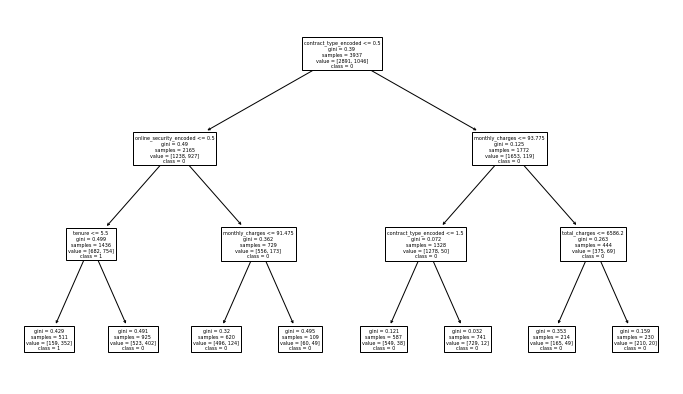

In [45]:
# Make the model
tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)

# Fit the model (on train and only train)
tree1 = tree1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree1.predict(X_train)

# Plot model
plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

In [46]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(tree1.score(X_train, y_train)))

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 3 depth")
pd.DataFrame(report)

Accuracy of Decision Tree classifier on training set: 0.78
Tree of 3 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.797431,0.688845,0.783338,0.743138,0.768582
recall,0.945002,0.336520,0.783338,0.640761,0.783338
f1-score,0.864968,0.452152,0.783338,0.658560,0.755289
support,2891.000000,1046.000000,0.783338,3937.000000,3937.000000


In [51]:
# Run loop to of max depth of 25 to find the best performance model
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
dtl = pd.DataFrame(metrics)
dtl["difference"] = dtl.train_accuracy - dtl.validate_accuracy
dtl[dtl.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])


,max_depth,train_accuracy,validate_accuracy,difference
4,5,0.810770,0.783175,0.027594
5,6,0.817120,0.774882,0.042238
6,7,0.834392,0.774289,0.060103
2,3,0.783338,0.764810,0.018527
7,8,0.851918,0.763033,0.088885
3,4,0.792990,0.761848,0.031141
0,1,0.734315,0.734005,0.000311
1,2,0.752604,0.719194,0.033409


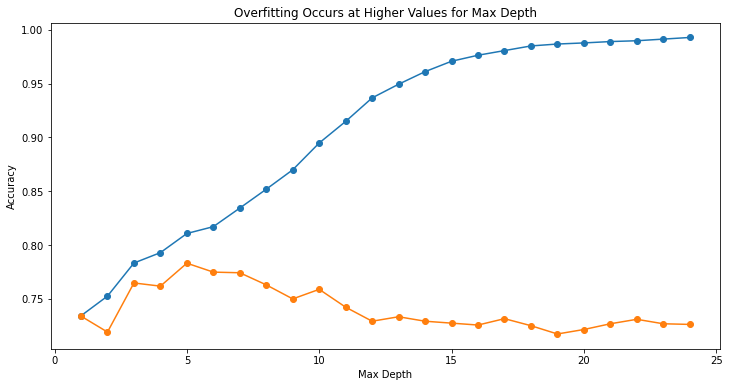

In [50]:
# Line graph of 'dtl'

plt.figure(figsize=(12, 6))
plt.plot(dtl.max_depth, dtl.train_accuracy, marker = 'o')
plt.plot(dtl.max_depth, dtl.validate_accuracy, marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

**Having max depth of 3 is the best to run of all decision tree models**

##### K-Nearest Neighbor (KNN)

In [52]:
# Create KNN object

# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Fit the model
knn.fit(X_train, y_train)

# Classify each customer by its estimated churn.
y_pred = knn.predict(X_train)

# Print classifcation report
report = classification_report(y_train, y_pred, output_dict=True)
print("n_neighbour = 1")
pd.DataFrame(report)

n_neighbour = 1


,0,1,accuracy,macro avg,weighted avg
precision,0.857832,0.729469,0.830836,0.793650,0.823728
recall,0.922518,0.577438,0.830836,0.749978,0.830836
f1-score,0.889000,0.644610,0.830836,0.766805,0.824069
support,2891.000000,1046.000000,0.830836,3937.000000,3937.000000


In [56]:
pd.DataFrame(knn.predict(X_train))

,0
0,0
1,0
2,0
3,0
4,0
...,...
3932,0
3933,1
3934,0
3935,0


fit on train

predict on train

evaluate on train

predict on validate

evaluate on validate

None of these model appear to be overfit. X model performed the best on the validate sample, therefore, I moved forward with that model.


predict on test

evaluate on test

I expect this model to perform with x% accuracy in the future on data it has not seen, given no major changes in our data source.


---

### Conclusion

#### Summary

#### Recommendations

#### Next Steps